In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
res = pd.read_csv('original_results.csv')
res.head()

,year,pred,label
0,2014,0.667310,1
1,2014,0.998766,1
2,2014,0.940415,1
3,2014,0.976085,1
4,2014,0.954318,1


In [4]:
labels = res.label.values
preds  = res.pred.values

In [5]:
%%time
np.random.seed(42)
frac = []
acc  = []
ths = []
for p_neg in np.random.uniform(0, 1, 200):
    for p_pos in np.random.uniform(0, 1, 500):
        sure_labels = np.array(labels)[(preds < p_neg) | (preds > p_pos)]
        sure_preds  = preds[(preds < p_neg) | (preds > p_pos)]

        TP = ((sure_labels == 1) & (sure_preds > 0.5)).sum()
        FP = ((sure_labels == 0) & (sure_preds > 0.5)).sum()
        FN = ((sure_labels == 1) & (sure_preds <= 0.5)).sum()
        TN = ((sure_labels == 0) & (sure_preds <= 0.5)).sum()

        frac.append(len(sure_labels)/len(labels))
        acc.append(1-(FP + FN)/len(sure_labels))
        ths.append([p_neg, p_pos])

CPU times: user 12.4 s, sys: 0 ns, total: 12.4 s
Wall time: 12.4 s


In [15]:
d = pd.DataFrame({'pneg':np.array(ths)[:,0],
                  'ppos':np.array(ths)[:,1],
                  'frac':frac,
                  'acc':acc})

In [23]:
d[(0.81 > d.frac) & (d.frac > 0.798)].sort_values('acc')

,pneg,ppos,frac,acc
16934,0.948886,0.988247,0.808873,0.928100
21545,0.909320,0.984060,0.803669,0.932168
21576,0.909320,0.983928,0.805491,0.932321
21692,0.909320,0.983762,0.806661,0.932419
75458,0.908266,0.983954,0.803799,0.932664
...,...,...,...,...
14602,0.046450,0.940348,0.799766,0.977875
74079,0.051479,0.940857,0.800156,0.977886
38773,0.074045,0.945364,0.800156,0.977886
41540,0.063558,0.943866,0.799636,0.978034


In [26]:
Counter(res[(res.pred < 0.063558) | (res.pred > 0.943844)].label)

Counter({1: 5196, 0: 950})

In [27]:
Counter(res[~((res.pred < 0.063558) | (res.pred > 0.943844))].label)

Counter({1: 999, 0: 541})

In [7]:
200*500

100000

In [10]:
from collections import Counter

In [14]:
6195/len(res)

0.8060109289617486

In [13]:
Counter(res.label)

Counter({1: 6195, 0: 1491})

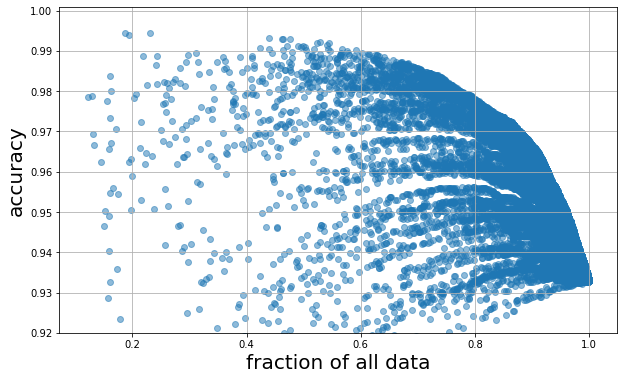

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(frac, acc, alpha=0.5)
plt.xlabel('fraction of all data', fontsize=20)
plt.ylabel('accuracy', fontsize=20)
plt.ylim(0.92, 1.001)
plt.grid()